<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/notebooks/2020_0512covid_19_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 中国共産党ウィルス covid-19 の動向を知りながら colab に慣れよう
- date: 2020-0518
- author: 浅川伸一
- source: https://towardsdatascience.com/say-goodbye-to-excel-a-simple-evaluation-of-python-grid-studio-using-covid-19-data-90624f322b81
- note: 駒澤大学 2020 年度教材

# まずは世界編

In [ ]:
import numpy as np
import pandas as pd
import json

In [ ]:
# Read all data
df = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv").dropna()
print(df.head())

      dateRep  ...  Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0  27/07/2020  ...                                           4.763187         
1  26/07/2020  ...                                           4.484546         
2  25/07/2020  ...                                           4.389913         
3  24/07/2020  ...                                           5.309955         
4  23/07/2020  ...                                           5.946098         

[5 rows x 12 columns]


In [ ]:
# Convert date to integer (because of Grid Studio limitation)
df.dateRep = pd.to_datetime(df.dateRep, format='%d/%m/%Y').dt.strftime('%Y%m%d').astype(int)

In [ ]:
# 日本のデータを表示
df_jp = df[df.countriesAndTerritories == 'Japan']
df_jp

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
15726,20200727,27,7,2020,607,0,Japan,JP,JPN,126860299.0,Asia,6.401530
15727,20200726,26,7,2020,596,3,Japan,JP,JPN,126860299.0,Asia,6.211557
15728,20200725,25,7,2020,830,1,Japan,JP,JPN,126860299.0,Asia,6.035773
15729,20200724,24,7,2020,927,2,Japan,JP,JPN,126860299.0,Asia,5.704700
15730,20200723,23,7,2020,726,1,Japan,JP,JPN,126860299.0,Asia,5.248293
...,...,...,...,...,...,...,...,...,...,...,...,...
15918,20200117,17,1,2020,0,0,Japan,JP,JPN,126860299.0,Asia,0.000788
15919,20200116,16,1,2020,0,0,Japan,JP,JPN,126860299.0,Asia,0.000788
15920,20200115,15,1,2020,1,0,Japan,JP,JPN,126860299.0,Asia,0.000788
15921,20200114,14,1,2020,0,0,Japan,JP,JPN,126860299.0,Asia,0.000000


In [ ]:
#df_jp['cases'].plot()
import matplotlib.pyplot as plt

last = 100
d = [x for x in range(len(df_jp['dateRep'][:last]))]
plt.plot(df_jp['deaths'][:last])  # 死者数のプロット

NameError: ignored

In [ ]:
df_jp['deaths'].sum()  # 死者数総計

996

In [ ]:
df['deaths'].sum()  # 全世界の死者数総計

648985

In [ ]:
#df[df.countriesAndTerritories == 'Japan']['deaths'].sum()
df[df.countriesAndTerritories == 'Japan']['popData2019']  # 日本の人口数を表示

15726    126860299.0
15727    126860299.0
15728    126860299.0
15729    126860299.0
15730    126860299.0
            ...     
15918    126860299.0
15919    126860299.0
15920    126860299.0
15921    126860299.0
15922    126860299.0
Name: popData2019, Length: 197, dtype: float64

In [ ]:
countries = set(sorted(df.countriesAndTerritories))
# 登録されている国名を表示
for i, c in  enumerate(sorted(countries)):
    if (i+1) % 10  == 0:
        print('')
    print(c,end=" ")

Afghanistan Albania Algeria Andorra Angola Anguilla Antigua_and_Barbuda Argentina Armenia 
Aruba Australia Austria Azerbaijan Bahamas Bahrain Bangladesh Barbados Belarus Belgium 
Belize Benin Bermuda Bhutan Bolivia Bonaire, Saint Eustatius and Saba Bosnia_and_Herzegovina Botswana Brazil British_Virgin_Islands 
Brunei_Darussalam Bulgaria Burkina_Faso Burundi Cambodia Cameroon Canada Cape_Verde Cayman_Islands Central_African_Republic 
Chad Chile China Colombia Comoros Congo Costa_Rica Cote_dIvoire Croatia Cuba 
Curaçao Cyprus Czechia Democratic_Republic_of_the_Congo Denmark Djibouti Dominica Dominican_Republic Ecuador Egypt 
El_Salvador Equatorial_Guinea Eritrea Estonia Eswatini Ethiopia Falkland_Islands_(Malvinas) Faroe_Islands Fiji Finland 
France French_Polynesia Gabon Gambia Georgia Germany Ghana Gibraltar Greece Greenland 
Grenada Guam Guatemala Guernsey Guinea Guinea_Bissau Guyana Haiti Holy_See Honduras 
Hungary Iceland India Indonesia Iran Iraq Ireland Isle_of_Man Israel Italy 
J

In [ ]:
unit = 10000  # 単位を 1 万人あたりの死者数に変換するための数
for c in ['Japan', 'Taiwan', 'United_States_of_America', 'Spain', 'Italy']:
    death_total = df[df.countriesAndTerritories == c]['deaths'].sum()
    population =  df[df.countriesAndTerritories == c]['popData2019'].iloc[0]
    death_ratio = death_total / population * unit
    print('{0:24s} {1:7d} {2:10d} {3:7.4f}'.format(c, death_total, int(population), death_ratio))

Japan                        996  126860299  0.0785
Taiwan                         7   23773881  0.0029
United_States_of_America  146935  329064917  4.4652
Spain                      28432   46937060  6.0575
Italy                      35107   60359546  5.8163


# ここから先は東京都のデータ

In [ ]:
import json
import urllib.request

# 東京都の感染者数は https://dev-covid19-tokyo.netlify.app/ で日々公開されている 
# このサイトのソースコードは以下の GitHub で公開されているので利用させていただく
# source: https://github.com/tokyo-metropolitan-gov/covid19
tokyo_json_file = 'https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/data.json'

# 実際のデータ入手
req = urllib.request.Request(tokyo_json_file)
with urllib.request.urlopen(req) as response:
    data = json.load(response)

In [ ]:
# 入手したデータの中身を確認
for k in data.keys():
    print(k)

contacts
querents
patients
patients_summary
discharges_summary
inspections_summary
inspection_persons
inspection_status_summary
lastUpdate
main_summary


In [ ]:
# いくつかのデータを表示
print(data['lastUpdate'])
data['main_summary']

2020/07/27 20:30


{'attr': '検査実施人数',
 'children': [{'attr': '陽性患者数',
   'children': [{'attr': '入院中',
     'children': [{'attr': '軽症・中等症', 'value': 1241},
      {'attr': '重症', 'value': 19}],
     'value': 1260},
    {'attr': '退院', 'value': 8464},
    {'attr': '死亡', 'value': 328},
    {'attr': '宿泊療養', 'value': 212},
    {'attr': '自宅療養', 'value': 483},
    {'attr': '調査中', 'value': 598}],
   'date': '2020/7/27 20:30',
   'value': 11345}],
 'value': 16351}

In [ ]:
# 別のデータを表示
data['main_summary']['children']

[{'attr': '陽性患者数',
  'children': [{'attr': '入院中',
    'children': [{'attr': '軽症・中等症', 'value': 1241},
     {'attr': '重症', 'value': 19}],
    'value': 1260},
   {'attr': '退院', 'value': 8464},
   {'attr': '死亡', 'value': 328},
   {'attr': '宿泊療養', 'value': 212},
   {'attr': '自宅療養', 'value': 483},
   {'attr': '調査中', 'value': 598}],
  'date': '2020/7/27 20:30',
  'value': 11345}]

In [ ]:
# 過去 n_last 日分の感染者データを表示
n_last = 14
data['patients_summary']['data'][-n_last:]
for x in data['patients_summary']['data'][-n_last:]:
    print(x['小計'], end=", ")

143, 165, 286, 293, 290, 188, 168, 237, 238, 366, 260, 295, 239, 131, 

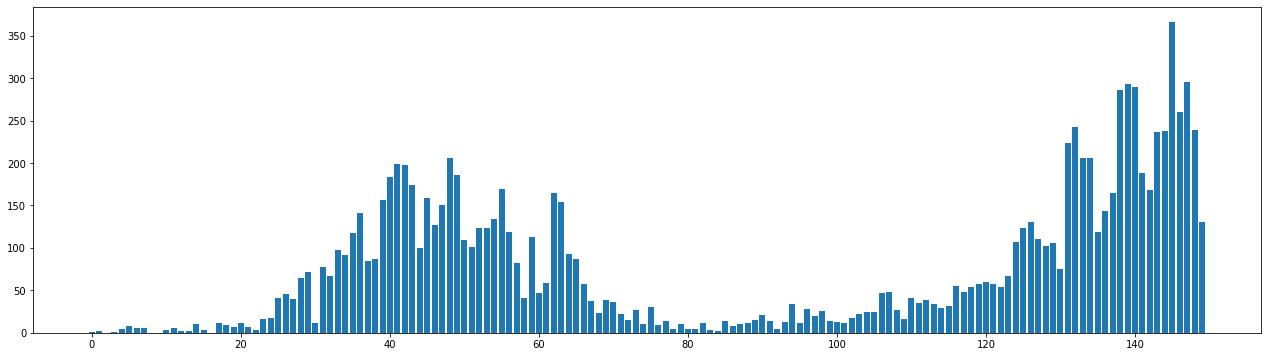

In [ ]:
# 過去 n_last 日分の感染者数を描画
n_last = 150

plt.figure(figsize=(22, 6)) # 画像のサイズ指定 (横(インチ), 縦(インチ))
patients_ = [x['小計'] for x in data['patients_summary']['data'][-n_last:]]
#plt.plot(patients_)
plt.bar(range(len(patients_)), patients_)
save_file_name = '2020-0518Tokyo_covid19_patients_summary.png'
plt.savefig(save_file_name)

In [ ]:
# 自分の PC にグラフをダウンロード
from google.colab import files
files.download(save_file_name)

In [ ]:
plt.plot(patients_)

In [ ]:
tokyo_json_file2 = 'https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/positive_status.json'

# 実際のデータ入手
req = urllib.request.Request(tokyo_json_file2)
with urllib.request.urlopen(req) as response:
    data2 = json.load(response)

In [ ]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 2.6MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120191 sha256=55e12896c0ee7f94213c94792e4957047d4d888486eddd8236477444ab09bce0
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


Text(0.5, 1.0, '重症者数の推移')

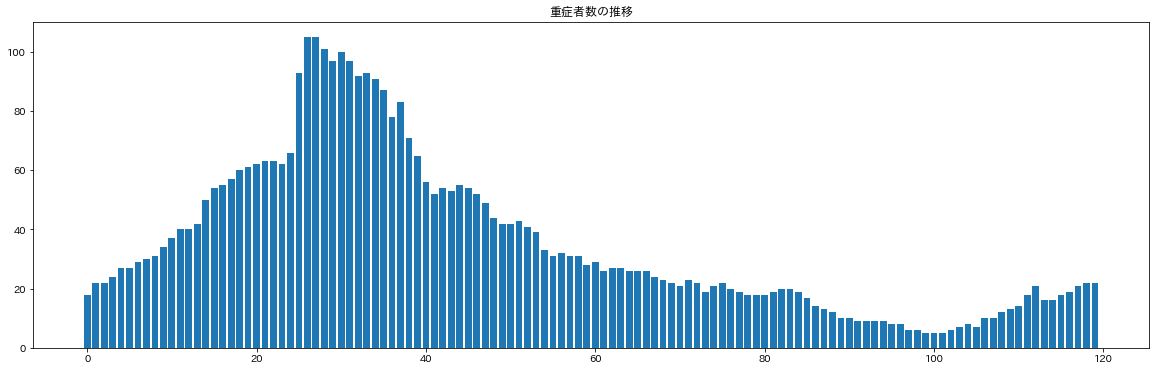

In [ ]:
import japanize_matplotlib

len(data2['data'])  # 154
type(data2['data'][-3:])  # list
#print(data2['data'][-3:]['severe_case'])

plt.figure(figsize=(20, 6)) # 画像のサイズ指定 (横(インチ), 縦(インチ))
n_last = 120
severe_cases = [x['severe_case'] for x in data2['data']]
plt.bar(range(len(severe_cases[-n_last:])), severe_cases[-n_last:])
plt.title('重症者数の推移')


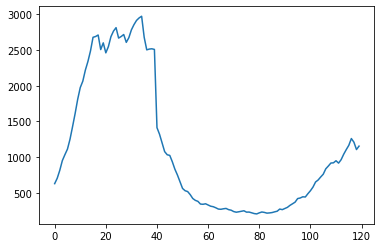

In [ ]:
hosp = [x['hospitalized'] for x in data2['data']]  # ['hospitalized']
plt.plot(hosp[-n_last:])